In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
## 8.7 연습문제 
## 1. 차원 축소의 주요 목적은 
## 훈련 알고리즘의 속도를 높이기 위해, 데이터를 시각화하고 가장 중요한 특성에 대한 통찰을 얻기 위해, 메모리 공간을 절약하기 위해 
## 주요 단점은 
## 일부 정보를 잃어버려 훈련 알고리즘의 성능의 감소 가능성, 계산 비용이 높다. 머신러닝 파이프 라인의 복잡도 증가,  변환된 데이터 이해하기 어려울 수 있다. 

## 2. 차원의 저주란 
## 저차원 공간에 없는 많은 문제들이 고차원 공간에서 일어난다는 사실을 뜻함
## 머신러닝에서 무작위로 선택한 고차원 벡터는 매우 희소해서 과대적합의 위험이 크고, 많은 양의 데이터가 있지 않으면
## 데이터에 있는 패턴을 잡아내기 매우 어려운 것이 흔한 현상이다.

## 3.데이터셋의 차원을 축소시키고 나서 이 작업을 원복할 수 있나? 가능하다면 어떻게 가능하고 아니면 어떻게 아닐까요?
## 여기서 설명한 알고리즘 중 하나를 사용해 데이터셋의 차원이 축소되면 일부 정보가 차원 축소 과정에서 사라지기 때문에 
## 이를 완벽하게 되돌리는 것은 불가능 그러나 일부 알고리즘(PCA 같은)은 비교적 원본과 비슷한 데이터셋을 재구성할 수 있는 
## 간단한 역변환 방법을 가지고 있지만,  다른 알고리즘들(T-SNE같은)은 그렇지 않다.

## 4. 매우 비선형적인 데이터셋의 차원을 축소하는 데 PCA를 사용할 수 있을까요?
## PCA는 불필요한 차원을 제거할 수 있기 때문에 매우 비선형적이더라도 대부분의 데이터셋에서 차원을 축소하는데 사용할 수 있다.
## 그러나 불필요한 차원이 없다면(예를 들면 스위스 롤 데이터 셋) PCA의 차원 축소는 너무 많은 정볼르 잃게 만든다. 
## 즉 스위스 롤은 펼쳐야 하며 말려진 것을 뭉개면 안된다.

## 5. 설명된 분산을 95%로 지정한 PCA를 1000개의 차원을 가진 데이터셋에 적용한다고 가정하겠다. 결과 데이터 셋의 차원은 몇일까?
## 데이터셋에 따라 다르다. 케이스를 살펴보면 먼저 거의 완벽하게 일렬로 늘어선 데이터 포인트로 구성된 데이터셋을 생각해보면 
## 이 경우 PCA는 분산의 95%를 유지하면서 데이터셋을 단 하나의 차원으로 줄일 수 있다. 
## 이번에는 완전히 무작위로 1000개의 차원에 걸쳐 흩어져 있는 데이터셋을 생각해보면 이 경우 분산의 95프로를 보존하려면 
## 거의 950개의 차원이 필요하다. 그러므로 답은 1에서 950개의 어떤 두든 될 수 있다. 
## 차원 수에 대한 함수로 설명된 분산의 그래프를 그려보는 것이 데이터셋에 내재된 차원 수를 대략 가늠하는 한 가지 방법이다. 

## 6. 기본 PCA, 점진적 PCA, 랜덤 PCA, 커널 PCA는 어느 경우에 사용될까? 
## 기본 PCA가 우선적으로 사용되지만 데이터셋 크기가 메모리에 맞을 때에 가능하다. 점진적 PCA는 메모리에 담을 수 없는 대용량 데이터셋 
## 하지만 기본 PCA보다 느리므로 데이터셋이 메모리 크기에 맞으면 기본 PCA를 사용해야 한다. 점진적 PCA는 새로운 샘플이 발생될때마다 
## 실시간으로 PCA를 적용해야 하는 온라인 작업에 사용 가능 랜덤 PCA는 데이터셋이 메모리 크기에 맞고 차원을 크게 축소시킬 때 사용된다.
## 이 경우에는 기본 PCA보다 훨씬 빠르다. 커널 PCA는 비선형 데이터셋에 유용하다.

## 7. 어떤 데이터셋에 적용한 차원 축소 알고리즘의 성능을 어떻게 평가할 수 있을까요?
##  직관적으로 데이터셋에서 너무 많은 정보를 잃지 않고 차원을 많이 제거할 수 있다면 차원축소 알고리즘이 잘 작동한 것이다. 
## 이를 측정하는 한 가지 방법은 역변환을 수행해서 재구성 오차를 측정하는 것이다. 하지만 모든 차원 축소 알고리즘이 역변환을 제공 
## 하지 않는다. 만약 차원 축소를 다른 머신러닝 알고리즘(예를 들어 랜덤 포레스트 분류기)을 적용하기 전에 전처리 단계로 사용한다면 
## 두 번째 알고리즘의 성능을 측정해볼 수 있다. 즉, 차원 축소가 너무 많은 정보를 잃지 않았다면 원본 데이터셋을 사용했을 떄와 비슷한 
## 성능이 나와야 한다. 

## 8. 두 개의 차원 축소 알고리즘을 연결할 수 있을까요?
## 당연히 두 개의 차원 축소 알고리즘을 연결할 수 있다. PCA로 불필요한 차원을 대폭 제거하고 난 다음 LLE 같이 훨씬 느린 
## 알고리즘을 적용하는 것이 대표적인 사례이다. 이런 2단계 방식은 LLE만 사용했을 떄와 비슷한 성능을 내지만 속도가 몇분의 1로 
## 줄어든다.

In [4]:
## 9. 연습문제 풀이
## MNIST 데이터셋 로드, 훈련 세트와 테스트 세트로 분할 
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

In [5]:
## 이 데이터셋에 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 시간을 잰 다음 

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [6]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [7]:
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 50.13s


In [8]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

In [9]:
## 그런 다음 PCA를 사용해 설명된 분산이 95%가 되도록 차원을 축소한다.

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [10]:
## 이 축소된 데이터셋에 새로운 랜덤포레스트 분류기를 훈려시키고 얼마나 오래 걸리는지 확인한다.
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)

t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [11]:
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 105.17s


In [12]:
## 이런! 훈련이 두 배 이상 느려졌습니다! 어떻게 이럴 수 있죠? 이 장에서 보았듯이 차원 축소는 언제나 훈련 시간을 줄여주지 못합니다. 
## 데이터셋, 모델, 훈련 알고리즘에 따라 달라집니다. 그림 8-6(위에 있는 manifold_decision_boundary_plot* 그래프)을 참고하세요. 
## 랜덤 포레스트 분류기 대신 소프트맥스 분류기를 적용하면 PCA를 사용해서 훈련 시간을 3배나 줄일 수 있습니다. 
## 잠시 후에 실제로 한번 해보겠습니다. 
## 하지만 먼저 새로운 랜덤 포레스트 분류기의 정밀도를 확인해 보죠.
## 문제: 이제 테스트 세트에서 이 분류기를 평가해보세요. 이전 분류기와 비교해서 어떤가요?

X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)
## 차원 축소를 했을 때 유용한 정보를 일부 잃었기 때문에 성능이 조금 감소되는 것이 일반적이다. 그렇지만 이 경우에는 성능 감소가 
## 좀 심각한 것 같다. PCA가 별로 도움이 되지 않네요. 훈련 시간도 느려지고 성능도 감소했습니다. 

0.9481

In [13]:
## 위의 결과를 보고 소프트 맥스를 사용하면 도움이 되는지 확인해 보자.
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [14]:
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 21.09s


In [15]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

In [16]:
##나쁘지 않다. 소프트맥스 회귀는 랜덤 포레스트 분류기보다 이 데이터셋에서 훈련하는데 더 많은 시간이 걸리고 테스트 세트에서의 성능도 
## 더 나쁘다. 하지만 지금 관심 사항은 아니고, PCA가 소프트맥스 회귀에 얼마나 도움이 되는지가 궁금하다.  
## 축소된 데이터셋에 소프트맥스 회귀 모델을 훈련시켜 보자

log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 =time.time()

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 8.51s


In [18]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9201

In [19]:
## 속도가 정말 많이 상승했다. 
## 성능이 조금 감소되었지만 애플리케이션에 따라서 2배 이상의 속도 향상에 대한 댓가로 적절한 것 같습니다.
## 여기서 알 수 있는 것: PCA는 속도를 아주 빠르게 만들어 주지만 항상 그런 것은 아니다

In [20]:
## 10번 문제 
## 문제: t-SNE 알고리즘을 사용해 MNIST 데이터셋을 2차원으로 축소시키고 맷플롯립으로 그래프를 그려보세요. 
## 이미지의 타깃 클래스마다 10가지 색깔로 나타낸 산점도를 그릴 수 있습니다.
## 앞서 로드한 MNIST 데이터셋을 사용합니다.
## 전체 60,000개의 이미지에 차원 축소를 하면 매우 오랜 시간이 걸리므로 10,000개의 이미지만 무작위로 선택하여 사용하겠습니다:

In [21]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [22]:
## 이제 t-SNE를 사용해 2D로 차원을 축소해 그래프로 나타낸다.
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.


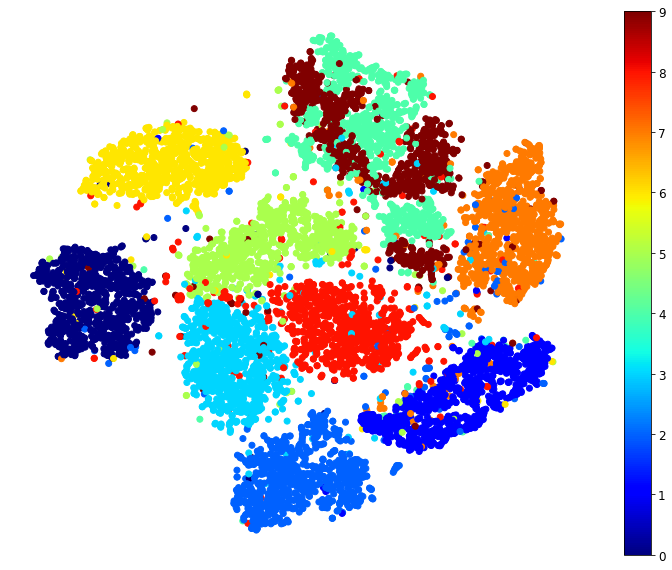

In [23]:
## 산점도를 그리기 위해서 scatter 함수 사용, 각 숫자마다 다른 색깔 사용 

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

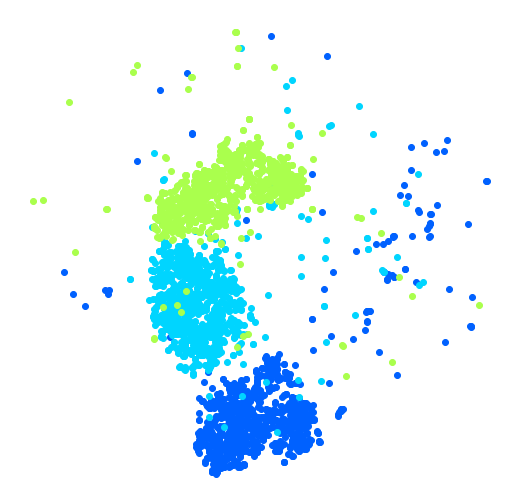

In [24]:
## 이 그래프로 알 수 있는 점은 겹치는 걸 통해서 어떤 숫자가 다른 것과 구분이 쉬운지 알려 준다.(예를 들면 0, 6, 8이 잘 구분되어 있다.) 
## 그리고 어떤 숫자가 구분이 어려운지 알려 준다.(가령, 4, 9, 5, 3 등)
## 많이 겹쳐진 것 같은 숫자 2, 3, 5에 집중해 보자

plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()